# SLAM assignment

In [114]:
# Importing the necessary libraries
import math
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

## Part (a): Finding del_x, del_y, & del_theta after moving each step along the path

In [115]:
# To plot the matplotlib generated plots in a separate window
%matplotlib qt

# to run GUI event loop
# plt.ion()

fig1, ax1 = plt.subplots()

# Setting the box limits
ax1.set_xlim(0,200)
ax1.set_ylim(0,200)

# Defining the path
x = np.array(range(200)).astype(np.float64)
y = 0.0001*(x - 50)**3 + 14

# Defining starting point, step size, & no of steps
x_start = 60
step = 5
nos = 45

# Initializing incremental values in x, y, & theta
del_x = np.zeros(nos)
del_y = np.zeros(nos)
del_theta = np.zeros(nos)

# Finding out the current value of x, y, & theta w.r.t time
# Finding out the incremental value of x, y, & theta w.r.t time
x_curr = x_start*np.ones(nos)
y_curr = (0.0001*(x_start - 50)**3 + 14)*np.ones(nos)
for i in range(nos):
    del_x[i] = step/(math.sqrt(1 + 0.0003**2*(x_curr[i] - 50)**4))
    del_y[i] = 0.0003*(x_curr[i] - 50)**2*del_x[i]
    del_theta[i] = 0.0006*(x_curr[i] - 50)*del_x[i]
    
    if i < nos-1:
        x_curr[i+1] = x_curr[i] + del_x[i]
        y_curr[i+1] = y_curr[i] + del_y[i]

theta_curr = np.arctan(0.0003*(x_curr - 50)**2)

# To plot the path traced out by the robot i.e. as evaluated from odometry calculations
# The thin yellow-colored line is the required path as traced out by the robot
ax1.plot(x_curr,y_curr,color = 'green',linewidth = 1.5)

# To define the landmarks: Enter values only above 150 so that the landmark is well ahead of the robot's sensor
# for perception.
# Enter lm1: (25,175), lm2: (180,110) for well-spaced landmarks; enter the i/p with a space in b/w
lm1 = [int(i) for i in list(input("Enter the coordinates of landmark1: ").split(" "))]
lm2 = [int(i) for i in list(input("Enter the coordinates of landmark2: ").split(" "))]

# To plot the landmarks
ax1.plot(lm1[0], lm1[1], marker = "X", markersize = 20, color = 'black')
ax1.plot(lm2[0], lm2[1], marker = "X", markersize = 20, color = 'black')

# To animate a car moving on the road
# To turn on the interactive mode
plt.ion()

# To plot the initial location of the sensor
ptr, = ax1.plot(x_curr[0], y_curr[0], marker = "o", markersize = 5, color = 'red')

# Initial coordinates of vertices of the car (rectangle)
x1 = x_curr - 5*np.sin(theta_curr)
y1 = y_curr + 5*np.cos(theta_curr)

x2 = x1 - 20*np.cos(theta_curr)
y2 = y1 - 20*np.sin(theta_curr)

x4 = x_curr + 5*np.sin(theta_curr)
y4 = y_curr - 5*np.cos(theta_curr)

x3 = x4 - 20*np.cos(theta_curr)
y3 = y4 - 20*np.sin(theta_curr)

# To place the car (rectangle) at the initial position
rect = ax1.add_patch(Polygon(np.array([[x1[0],y1[0]],[x2[0],y2[0]],[x3[0],y3[0]],[x4[0],y4[0]]]), True, color = 'blue'))

plt.show()

for i in range(1,x_curr.size):
    ptr.set_xdata(x_curr[i])
    ptr.set_ydata(y_curr[i])
    
    rect.set_xy(np.array([[x1[i],y1[i]],[x2[i],y2[i]],[x3[i],y3[i]],[x4[i],y4[i]]]))
    
    fig1.canvas.draw()
    
    fig1.canvas.flush_events()
    
    time.sleep(0.1)

Enter the coordinates of landmark1: 25 175
Enter the coordinates of landmark2: 180 110


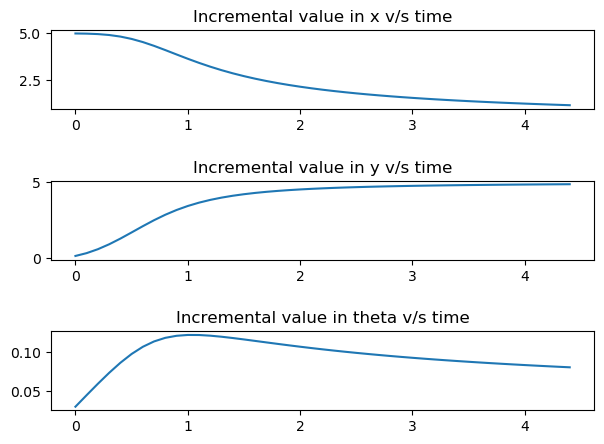

In [90]:
# To plot del_x, del_y, & del_theta v/s time

%matplotlib inline

step_time = 0.1
time = step_time*np.array(range(nos))

fig2, ax2 = plt.subplots(3,1)

ax2[0].plot(time, del_x)
ax2[0].set_title('Incremental value in x v/s time')

ax2[1].plot(time, del_y)
ax2[1].set_title('Incremental value in y v/s time')

ax2[2].plot(time, del_theta)
ax2[2].set_title('Incremental value in theta v/s time')

fig2.tight_layout(pad = 2)

plt.show()

In [103]:
print(x_curr[20])
print(y_curr[20])

134.4889889100212
70.60253383617348


## Part (b): To simulate the effect of sensor readings by adding noise to odometry calculations

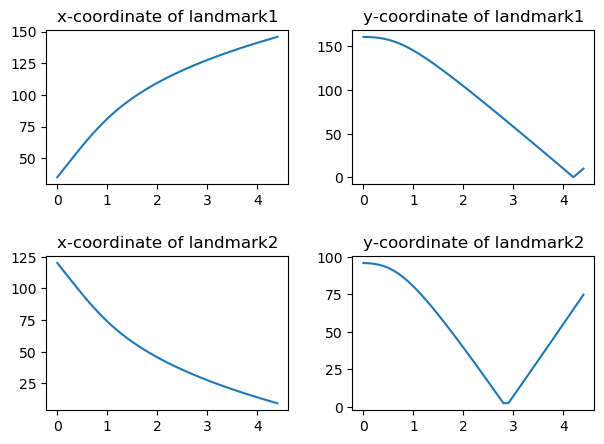

In [111]:
# To define the sensor perceptions of landmarks 1 & 2

sp1_x = np.absolute(x_curr - lm1[0]*np.ones(x_curr.size))
sp1_y = np.absolute(y_curr - lm1[1]*np.ones(y_curr.size))
sp2_x = np.absolute(x_curr - lm2[0]*np.ones(x_curr.size))
sp2_y = np.absolute(y_curr - lm2[1]*np.ones(y_curr.size))

fig3, ax3 = plt.subplots(2,2)

ax3[0, 0].plot(time, sp1_x)
ax3[0, 0].set_title('x-coordinate of landmark1')

ax3[0, 1].plot(time, sp1_y)
ax3[0, 1].set_title('y-coordinate of landmark1')

ax3[1, 0].plot(time, sp2_x)
ax3[1, 0].set_title('x-coordinate of landmark2')

ax3[1, 1].plot(time, sp2_y)
ax3[1, 1].set_title('y-coordinate of landmark2')

fig3.tight_layout(pad = 2)

plt.show()

## Part (c): To use graph-slam to estimate the position and orientation of the robot and update accordingly in the map

In [120]:
# Perform graph slam for the steps 20->21, 21->22:
# x lies between L0 & L1
# y less than L0 & L1
A = np.array([
    [1,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0],
    [-1,0,1,0,0,0,0,0,0,0],
    [0,-1,0,1,0,0,0,0,0,0],
    [0,0,-1,0,1,0,0,0,0,0],
    [0,0,0,-1,0,1,0,0,0,0],
    [1,0,0,0,0,0,-1,0,0,0],
    [0,-1,0,0,0,0,0,1,0,0],
    [0,0,1,0,0,0,-1,0,0,0],
    [0,0,0,-1,0,0,0,1,0,0],
    [0,0,0,0,1,0,-1,0,0,0],
    [0,0,0,0,0,-1,0,1,0,0],
    [-1,0,0,0,0,0,1,0,0,0],
    [0,-1,0,0,0,0,0,1,0,0],
    [0,0,-1,0,0,0,1,0,0,0],
    [0,0,0,-1,0,0,0,1,0,0],
    [0,0,0,0,-1,0,1,0,0,0],
    [0,0,0,0,0,-1,0,1,0,0]
])

B = np.array([[x_curr[20]],[y_curr[20]],[del_x[20]],[del_y[20]],[del_x[21]],[del_y[21]],[sp1_x[20]],[sp1_y[20]],[sp1_x[21]],[sp1_y[21]],[sp1_x[22]],[sp1_y[22]],[sp2_x[20]],[sp2_y[20]],[sp2_x[21]],[sp2_y[21]],[sp2_x[22]],[sp2_y[22]]])

X = np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.matrix.transpose(A), A)), np.matrix.transpose(A)), B)

print('The estimated poses and landmark locations based on the constraints are: ')
print(X)

The estimated poses and landmark locations based on the constraints are: 
[[134.48898891]
 [ 70.60253384]
 [136.6045028 ]
 [ 75.13294232]
 [138.63511828]
 [ 79.70203421]
 [102.5       ]
 [142.5       ]
 [  0.        ]
 [  0.        ]]
